> 이 문서의 폰트크기는 브라우저 인쇄시 인쇄 배율 80%로 최적화 되어 있음

# 미분 : 단변수 함수의 접선 그리기

> 1. 단변수 함수의 수치미분 함수와 접선 방정식
> 2. 예제 함수
> 3. 예제 함수의 접선
> 4. 함수의 접선 그리기

- 교재 "2.3절 미분" 내용 참조

In [1]:
# multi line 출력을 위한 셀 -- 필요없으면 아래 두 라인을 주석(#) 처리해서 기능 해제
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 팝업 창을 띠우지 않고 주피터 노트북 안에 그림을 그리라는 명령
%matplotlib inline  

import sys, os
import numpy as np
import matplotlib.pyplot as plt

# 1. 단변수 함수의 수치미분 함수와 접선 방정식

## (1) 함수의 수치미분 값 산출 함수

In [3]:
def numerical_gradient(f, x):
    """
    :param f: function
    :param x: x축 좌표
    :return: f(x)의 기울기 값
    """
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

## (2)  함수의 접선의 방정식

In [4]:
def tangent_line(f, x):
    """
    :param f: 함수
    :param x: x축 좌표
    :param analytic_gradiant : 분석미분식(아래 select 값이 1일 때 사용)
    :param select : 0(수치미분), 1(분석미분)
    :return: 곡선의 접선식 기울기, g(x)=ax + b
    """
    a = numerical_gradient(f, x)
    b = f(x) - a * x
    return a, lambda x: a * x + b

# 2. 예제 함수

- 예제 단변수 함수와  해당 분석적 미분값 산출 함수
- $y = 0.5 (x-1)^2 - 5$
- $dy/dx = x-1$

In [5]:
def fn1(x):
    return 0.5 * (x - 1)**2 - 5

def fn1_analytic_gradient(x):
    return x-1

# 3. 예제  함수 그리기

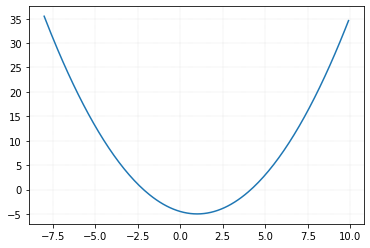

In [6]:
x = np.arange(-8.0, 10.0, 0.1)
y = fn1(x)
plt.plot(x, y, label='0.5(x-1)^2')
plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.show()

# 4. 예제 함수 상의 특정 좌표에 대한 접선

## (1)  tangent_line() 함수 사용한 x가 5인 점에서 함수 fn1()의 접선 그리기

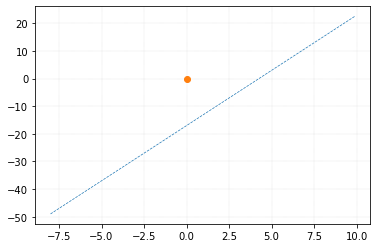

In [7]:
tline_gradient, tline_eq = tangent_line(fn1, 5)

x = np.arange(-8.0, 10.0, 0.1)
y = tline_eq(x)
plt.plot(x, y, linestyle='--',  linewidth=0.7, label="Tangent line at 5 ")
plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.plot(0, 0, 'o')  # 원점

plt.show()

####  x=5일 일 때, 수치비분과 미분함수 각각에 대한 접선의 기울기 값 비교

In [8]:
print(tline_gradient)               # 접선의 기울기 (수치미분)
print(fn1_analytic_gradient(5))    # 접선의 기울기 (미분함수 버전)

3.9999999999906777
4


## (2) 함수의 접선 그리기
-  함수 x가 5일 때 fn1()의 접선을 함수와 함께 그리기

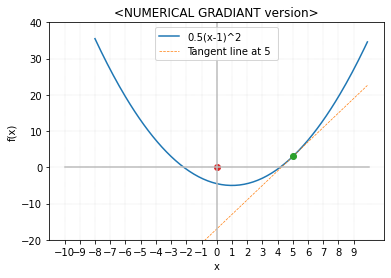

In [9]:
# 함수 그리기
x = np.arange(-8.0, 10.0, 0.1)
y = fn1(x)
plt.plot(x, y, label='0.5(x-1)^2')

# 접선 그리기
tline_gradient, tline_eq = tangent_line(fn1, 5)
y = tline_eq(x)
plt.plot(x, y, linestyle='--',  linewidth=0.7, label="Tangent line at 5 ")
plt.plot(5, tline_eq(5), 'o')
plt.plot(0, 0, 'o')

# ====== 화면에 표시
plt.title("<NUMERICAL GRADIANT version>")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xticks(np.arange(-10, 10))
plt.grid(color='#BDBDBD', linestyle='--', linewidth=0.2 )
plt.plot([-10, 10], [0, 0], '#BDBDBD')  # x-축 라인
plt.plot([0, 0], [-30, 40], '#BDBDBD')  # y-축 라인

plt.legend(loc='upper center')
plt.ylim(-20, 40)  # range of y axis
plt.show()
